Dropdown(description='Category:', options=('All', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_…

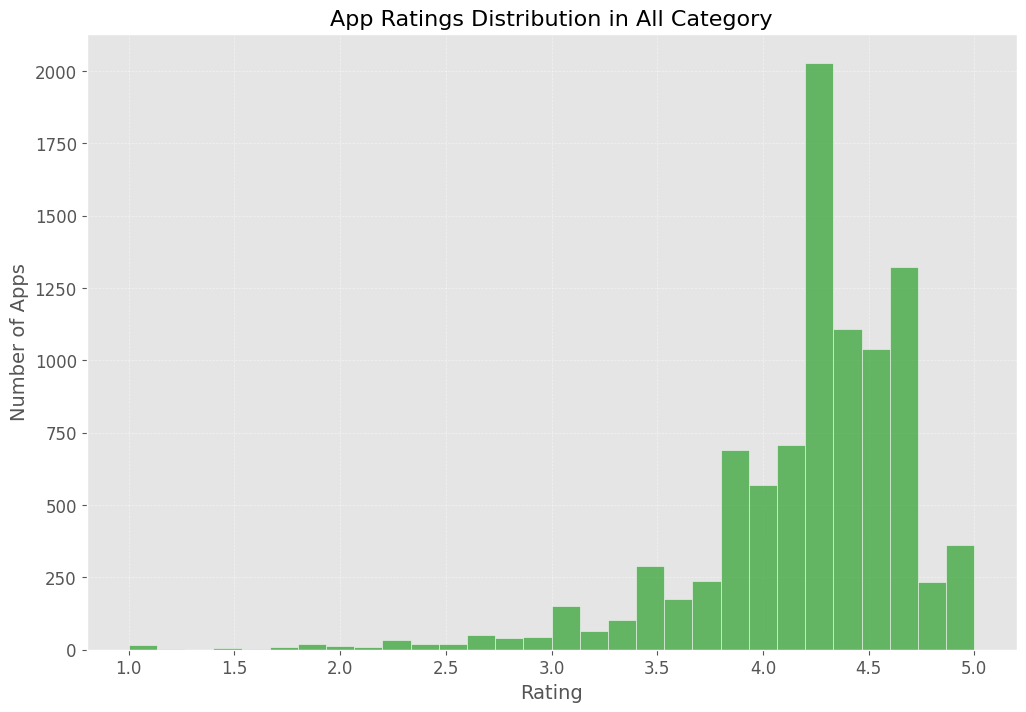

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
df = pd.read_csv('googleplaystore.csv')  

# Clean and prepare the data
df = df[df['Rating'].notnull()]
df = df[df['Rating'] <= 5]  # Assuming the maximum rating is 5

# Function to update the plot based on the selected category
def update_plot(category):
    # Filter the data by the selected category
    if category and category != 'All':
        filtered_data = df[df['Category'] == category]
    else:
        filtered_data = df

    # Generate the plot
    plt.figure(figsize=(12, 8))
    plt.hist(filtered_data['Rating'], bins=30, color='#2ca02c', edgecolor='white', alpha=0.7)
    plt.title(f'App Ratings Distribution in {category if category else "All"} Category', fontsize=16)
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Number of Apps', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    plt.show()

# Create a dropdown for category selection
category_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df['Category'].unique().tolist()),
    description='Category:'
)

# Display the dropdown and update the plot on change
def on_category_change(change):
    update_plot(change.new)

category_dropdown.observe(on_category_change, names='value')

# Display UI
display(category_dropdown)

# Initialize the plot with 'All' category
update_plot('All')
